In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook as tqdm
import nltk

import matplotlib.pyplot as plt
%matplotlib inline

from importlib import reload

from ReviewFeatureExtractor import ExtractBoW

### Hyperparameters

In [2]:
VOC_SIZE = 100000
REVIEW_CUTOFF_DATE = pd.Timestamp(2015, 12, 31)

### All Words

In [3]:
e = ExtractBoW(voc_size=VOC_SIZE)

e.load_word_vecs('data/wiki-news-300d-1M.vec')

### Need to iterate through each business and person

In [5]:
df_reviews = pd.read_pickle('results/tor_reviews.p')  # reviews
df_reviews['date'] = df_reviews['date'].astype('datetime64[ns]')
df_reviews = df_reviews[df_reviews['date'] > REVIEW_CUTOFF_DATE]

df_bus = pd.read_pickle('results/rest_univ_filter.p')  # businesses
df_users = pd.read_pickle('results/tor_users.p')  # users

### What is the distribution of review dates?

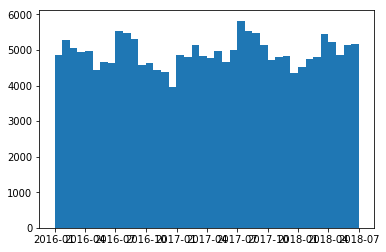

In [6]:
plt.hist(df_reviews['date'].values, bins=40)
plt.show()

In [7]:
print(df_bus.shape)
print(df_users.shape)
print(df_reviews.shape)

(10914, 16)
(93075, 21)
(196768, 9)


In [8]:
df_reviews.columns

Index(['business_id', 'cool', 'date', 'funny', 'review_id', 'stars', 'text',
       'useful', 'user_id'],
      dtype='object')

### Businesses

In [8]:
res_dict = {}

for i, bus_id in tqdm(enumerate(df_bus.index)):
    reviews_df = df_reviews[df_reviews['business_id'] == bus_id]
    tot_reviews = reviews_df.shape[0]
    
    # print("now processing %s with %s reviews" % (bus_id, tot_reviews))
    
    avg_stars = reviews_df['stars'].mean()
    tot_cool = reviews_df['cool'].sum()
    tot_funny = reviews_df['funny'].sum()
    tot_useful = reviews_df['useful'].sum()
    
    texts = reviews_df['text'].values
    
    if tot_reviews > 0:
        vec_all = e.extract(texts)
        vec_n = e.extract(texts, word_type=e.WORD_TYPE_NOUN)
        vec_j = e.extract(texts, word_type=e.WORD_TYPE_ADJ)
        vec_v = e.extract(texts, word_type=e.WORD_TYPE_VERB)
    else:
        vec_all = np.zeros(e.loaded_embeddings.shape[1])
        vec_n = np.zeros(e.loaded_embeddings.shape[1])
        vec_j = np.zeros(e.loaded_embeddings.shape[1])
        vec_v = np.zeros(e.loaded_embeddings.shape[1])
        
    res_dict[bus_id] = {
        'tot_reviews': tot_reviews,
        'avg_stars': avg_stars,
        'tot_cool': tot_cool,
        'tot_funny': tot_funny,
        'tot_useful': tot_useful,
        'vec_all': vec_all,
        'vec_n': vec_n,
        'vec_j': vec_j,
        'vec_v': vec_v,
    }
    
    if i % 500 == 0:
        print("processed %s/%s businesses" % (i, len(df_bus.index)))
    
res_df = pd.DataFrame(res_dict).T

processed 0/13140 businesses
processed 500/13140 businesses
processed 1000/13140 businesses
processed 1500/13140 businesses
processed 2000/13140 businesses
processed 2500/13140 businesses
processed 3000/13140 businesses
processed 3500/13140 businesses
processed 4000/13140 businesses
processed 4500/13140 businesses
processed 5000/13140 businesses
processed 5500/13140 businesses
processed 6000/13140 businesses
processed 6500/13140 businesses
processed 7000/13140 businesses
processed 7500/13140 businesses
processed 8000/13140 businesses
processed 8500/13140 businesses
processed 9000/13140 businesses
processed 9500/13140 businesses
processed 10000/13140 businesses
processed 10500/13140 businesses
processed 11000/13140 businesses
processed 11500/13140 businesses
processed 12000/13140 businesses
processed 12500/13140 businesses
processed 13000/13140 businesses



In [9]:
res_df.to_pickle('results/bus_review_extracts.p')

### Users

In [9]:
df_reviews.columns

Index(['business_id', 'cool', 'date', 'funny', 'review_id', 'stars', 'text',
       'useful', 'user_id'],
      dtype='object')

In [13]:
res_dict = {}

for i, u_id in tqdm(enumerate(df_users.index)):
    reviews_df = df_reviews[df_reviews['user_id'] == u_id]
    tot_reviews = reviews_df.shape[0]
    
    # print("now processing %s with %s reviews" % (bus_id, tot_reviews))
    
    avg_stars = reviews_df['stars'].mean()
    tot_cool = reviews_df['cool'].sum()
    tot_funny = reviews_df['funny'].sum()
    tot_useful = reviews_df['useful'].sum()
    
    texts = reviews_df['text'].values
    
    if tot_reviews > 0:
        vec_all = e.extract(texts)
        vec_n = e.extract(texts, word_type=e.WORD_TYPE_NOUN)
        vec_j = e.extract(texts, word_type=e.WORD_TYPE_ADJ)
        vec_v = e.extract(texts, word_type=e.WORD_TYPE_VERB)
    else:
        vec_all = np.zeros(e.loaded_embeddings.shape[1])
        vec_n = np.zeros(e.loaded_embeddings.shape[1])
        vec_j = np.zeros(e.loaded_embeddings.shape[1])
        vec_v = np.zeros(e.loaded_embeddings.shape[1])
        
    res_dict[u_id] = {
        'tot_reviews': tot_reviews,
        'avg_stars': avg_stars,
        'tot_cool': tot_cool,
        'tot_funny': tot_funny,
        'tot_useful': tot_useful,
        'vec_all': vec_all,
        'vec_n': vec_n,
        'vec_j': vec_j,
        'vec_v': vec_v,
    }
    
    if i % 1000 == 0:
        print("processed %s/%s users" % (i, len(df_users.index)))
    
res_df = pd.DataFrame(res_dict).T
res_df.to_pickle('results/user_review_extracts.p')

processed 0/93075 users
processed 1000/93075 users
processed 2000/93075 users
processed 3000/93075 users
processed 4000/93075 users
processed 5000/93075 users
processed 6000/93075 users
processed 7000/93075 users
processed 8000/93075 users
processed 9000/93075 users
processed 10000/93075 users
processed 11000/93075 users
processed 12000/93075 users
processed 13000/93075 users
processed 14000/93075 users
processed 15000/93075 users
processed 16000/93075 users
processed 17000/93075 users
processed 18000/93075 users
processed 19000/93075 users
processed 20000/93075 users
processed 21000/93075 users
processed 22000/93075 users
processed 23000/93075 users
processed 24000/93075 users
processed 25000/93075 users
processed 26000/93075 users
processed 27000/93075 users
processed 28000/93075 users
processed 29000/93075 users
processed 30000/93075 users
processed 31000/93075 users
processed 32000/93075 users
processed 33000/93075 users
processed 34000/93075 users
processed 35000/93075 users
proce

In [14]:
res_df.head()

,avg_stars,tot_cool,tot_funny,tot_reviews,tot_useful,vec_all,vec_j,vec_n,vec_v
hxqo4NyJFfeOmuoVi--s1A,5,0,0,1,0,"[-0.02201454545454546, -0.0022627272727272687,...","[-0.10801666666666666, -0.06435, -0.0435500000...","[-0.03407037037037037, -0.0028407407407407353,...","[-0.0175125, 0.009274999999999999, -0.023675, ..."
B7Fh30KQT1xPSGt_pIhRRA,NaN,0,0,0,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
FCtoTo9zSH1cSAkascfEHw,1,0,0,1,0,"[-0.011431914893617022, -0.0032063829787234046...","[-0.01654285714285714, -0.04587142857142857, -...","[-0.007938461538461537, 0.02752307692307692, -...","[-0.006627272727272734, -0.021236363636363643,..."
YHWsLBS8jzZiPjKHMFOaAA,NaN,0,0,0,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
XLA3LkbfQfeA-VYO7Zgzyg,NaN,0,0,0,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [19]:
tot_rev_distr = res_df[res_df['tot_reviews'] > 0]['tot_reviews'].sort_values().values

In [21]:
tot_rev_distr

array([1, 1, 1, ..., 255, 297, 327], dtype=object)

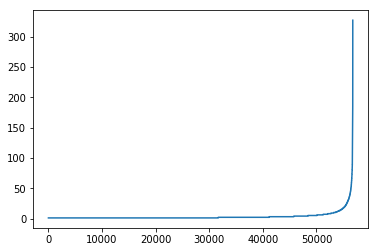

In [22]:
plt.plot(tot_rev_distr)
plt.show()